In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from CellModels.Cells.Figures import MultiFigurePdf
from CellModels.Clustering.Data import HarmonizedClusteringResult
from CellModels.Clustering.Figures import GeneClusteringPlot, MultiClusteringPlot
from CellModels.Clustering.IO import ClusteringReader

In [3]:
mf = ClusteringReader.read('/Users/rejsmont/Google Drive File Stream/My Drive/Projects/RDN-WDP/clustering-h5/Ato/prev/clustering_Ato_s15r1250.h5')

/usr/local/anaconda3/envs/rdn-wdp/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3263: PerformanceWarning: indexing past lexsort depth may impact performance.
  if (await self.run_code(code, result,  async_=asy)):


In [12]:
d = mf.cells[mf.config.rf_features + [('Cluster', 'ward', 6)]]
d

Position                      Measurements             \
                    Normalized                        Normalized Prominence   
                             x          y         z      mCherry    mCherry   
Gene Sample Nucleus                                                           
Abl  1Q8GA8 2         1.454965  15.329020  0.751815     0.171228   0.837475   
            3         1.979088  15.838467  0.740619     0.187337   1.006505   
            5         6.102696  19.271921  0.854784     0.195026   1.047569   
            6        10.614307  22.123290  0.778087     0.162865   0.861932   
            9         0.639369  12.605514  0.797042     0.245897   1.123186   
...                        ...        ...       ...          ...        ...   
NaN  vTdokD 10751    66.694115 -13.468093  4.726587     0.312997   0.871093   
            10753    58.885457  -9.862428  4.743688     0.256619   0.795890   
            10754    59.486472  -7.973799  4.738618     0.265367   0.789268   
            10755    75.649677  -4.890355  4.733813     0.525188   0.865798   
            10756    72.686296  -2.889620  4.738316     0.401253   0.856474   

                                       Cluster  
                          Angle    Raw    ward  
                        mCherry Volume       6  
Gene Sample Nucleus                             
Abl  1Q8GA8 2         72.597306   5020     3.0  
            3         44.716713   4522     3.0  
            5        173.828641  12339     3.0  
            6        129.476525   8100     3.0  
            9         37.003297   4806     0.0  
...                         ...    ...     ...  
NaN  vTdokD 10751      7.440603  10754     5.0  
            10753     39.735418   7902     5.0  
            10754     24.573659   8378     5.0  
            10755    132.908412  11080     5.0  
            10756     33.658557   6274     5.0  

[2717442 rows x 8 columns]

In [7]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [14]:
d.columns = ['x', 'y', 'z', 'ato', 'p_ato', 'a_ato', 'vol', 'cluster']

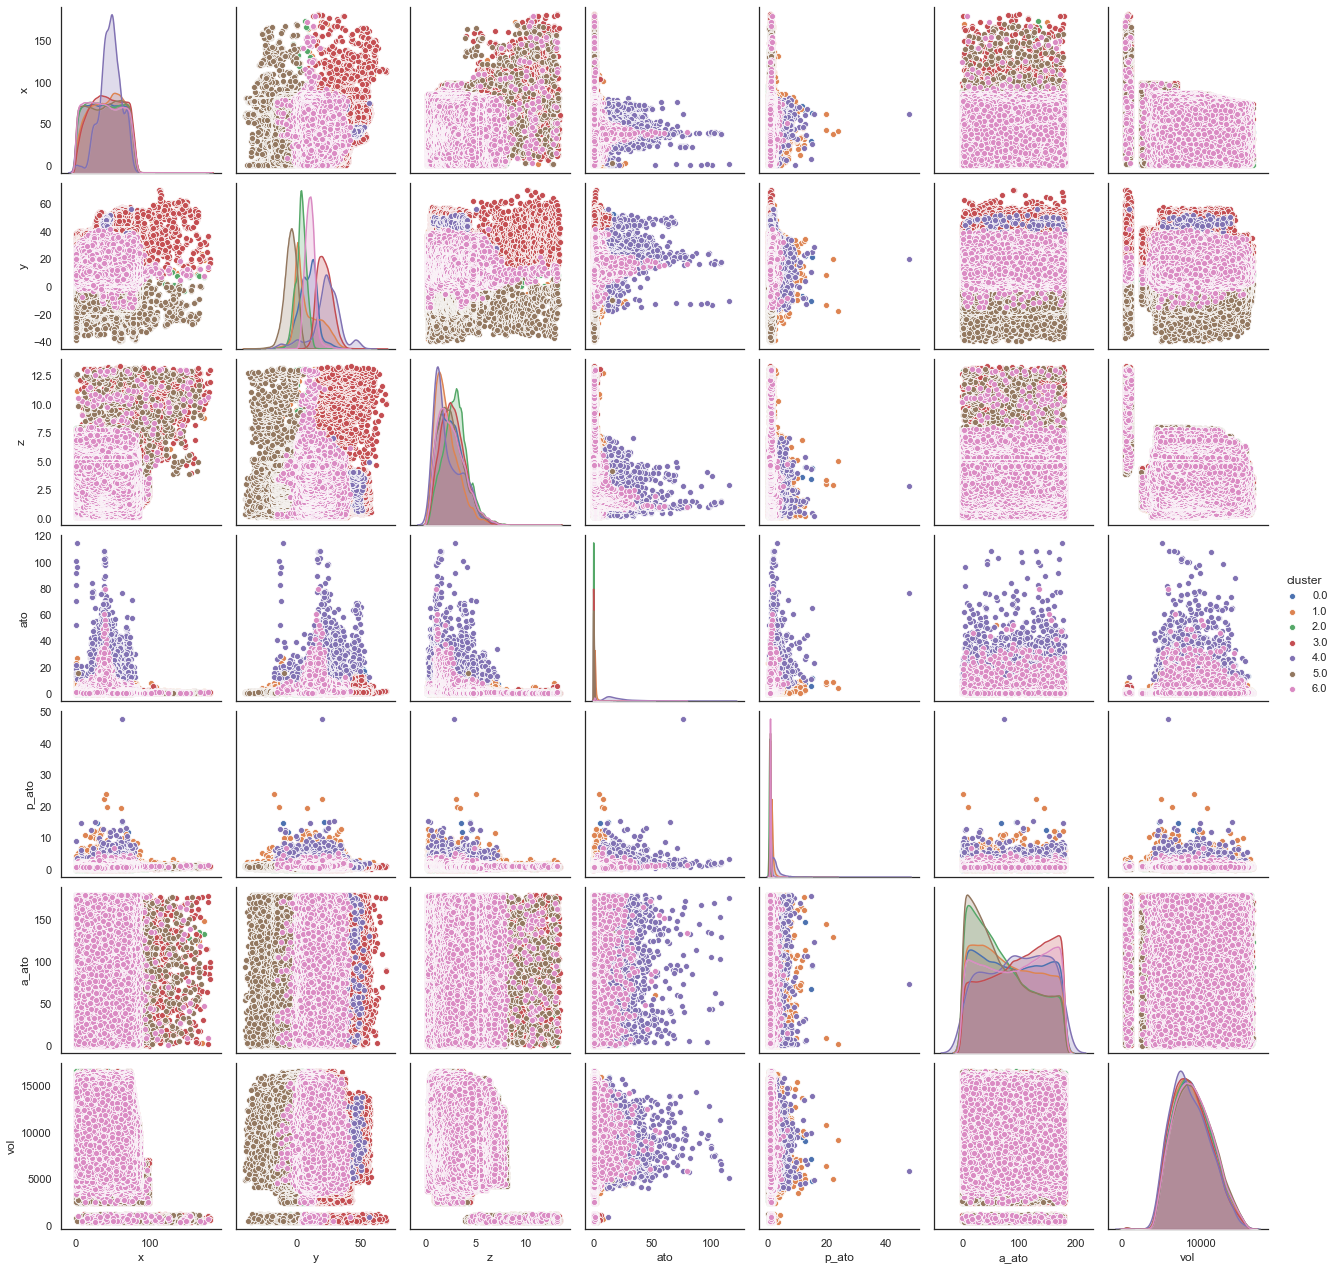

In [15]:
sns.pairplot(d, hue='cluster')

In [ ]:
import umap
reducer = umap.UMAP()
data = d[['x', 'y', 'z', 'ato', 'p_ato', 'a_ato', 'vol']].values
scaled_data = StandardScaler().fit_transform(data)
embedding = reducer.fit_transform(scaled_data)
